# IMPORTING NECESSARY PACKAGES

In [7]:
# Importing all relevant packages to the project

import warnings  # Import warnings to handle warning messages
warnings.filterwarnings('ignore')  # Ignore warning messages to avoid cluttering the output
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Importing ensemble models
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split # importing the train_test_split
from sklearn.preprocessing import LabelEncoder # importing the label encoder
from imblearn.over_sampling import SMOTE # importing SMOTE for balancing test set
from sklearn.linear_model import LogisticRegression # importing the Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay # import Evaluation Metrics
from sklearn.model_selection import RandomizedSearchCV # importing RandomizedSearchCV
from scipy.stats import loguniform # importing loguniform
from sklearn.model_selection import StratifiedKFold # importing StratifiedKFold for cross-validation
from sklearn.model_selection import GridSearchCV # importing GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score # importing roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve # importing precision_recall_curve

%matplotlib inline

In [8]:
# Loarding the dataset
df = pd.read_csv('Datasets/Breast_Cancer_Wisconsin_Diagnostic.csv')

pd.set_option('display.max_columns', None)

In [3]:
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


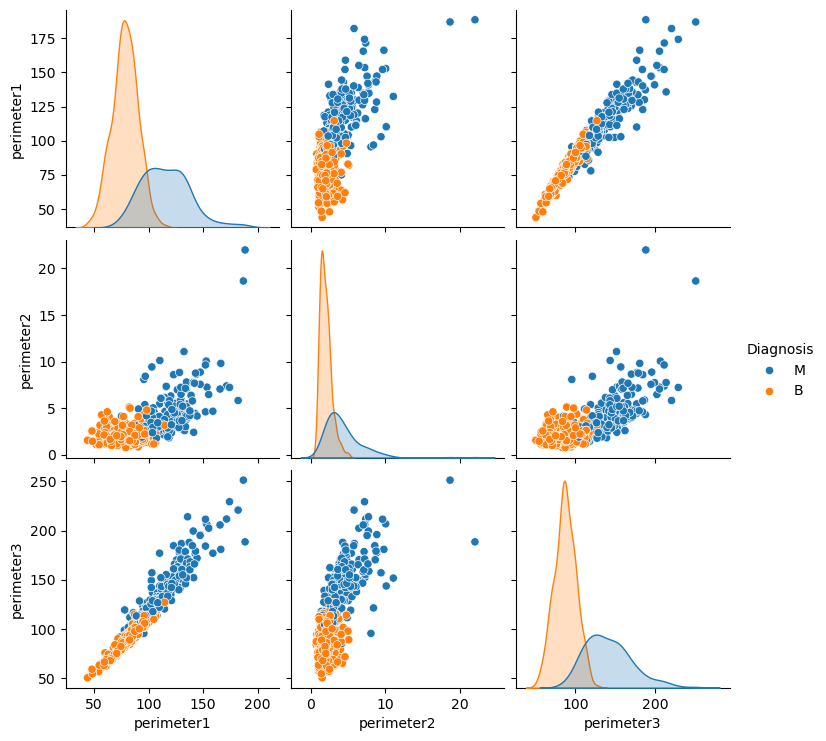

In [17]:
# Pairplot to visualize distributions and relationships
sns.pairplot(df, vars=['perimeter1', 'perimeter2', 'perimeter3'], hue='Diagnosis')



In [32]:
importances.sort_values(ascending=False)

perimeter3            0.128340
concave_points1       0.113313
area3                 0.112177
concave_points3       0.107667
radius3               0.078182
radius1               0.075493
perimeter1            0.058543
area1                 0.053144
concavity1            0.045853
area2                 0.042245
concavity3            0.030501
radius2               0.022106
texture3              0.016153
texture1              0.014817
compactness3          0.012802
smoothness3           0.012058
symmetry3             0.011751
fractal_dimension3    0.007258
smoothness1           0.006690
perimeter2            0.006380
symmetry2             0.005318
smoothness2           0.005262
compactness1          0.005245
fractal_dimension2    0.004923
compactness2          0.004332
symmetry1             0.004184
texture2              0.003958
fractal_dimension1    0.003935
concavity2            0.003687
concave_points2       0.003685
dtype: float64

In [33]:
mi_scores.sort_values(ascending=False)

perimeter3            0.478348
area3                 0.465511
radius3               0.454111
concave_points1       0.440706
concave_points3       0.437532
perimeter1            0.403950
concavity1            0.374418
radius1               0.367048
area1                 0.357726
area2                 0.340005
concavity3            0.315458
perimeter2            0.278194
radius2               0.249202
compactness3          0.223871
compactness1          0.211384
concave_points2       0.128434
texture3              0.124673
concavity2            0.116679
smoothness3           0.103692
texture1              0.096293
symmetry3             0.090221
smoothness1           0.077155
compactness2          0.074619
fractal_dimension3    0.068935
symmetry1             0.064646
fractal_dimension2    0.039545
smoothness2           0.016064
symmetry2             0.012733
fractal_dimension1    0.007163
texture2              0.000000
dtype: float64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity1,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


# Exploratory Data Analysis

In [4]:
def Explore_dataset(df):
    print("1. Dataset Dimensions:", df.shape)
    print("\n2. Column Names:\n", df.columns.tolist())
    print("\n3. Summary Info:")
    df.info()
    print("\n4. Missing Values per Column:\n", df.isna().sum())
    print("\n5. Duplicate Rows:", df.duplicated().sum())
    print("\n6. Duplicate Columns:", df.T.duplicated().sum())
    print("\n7. Summary Statistics:\n", df.describe())

    # Detect Outliers
    outlier_counts = {
        col: len(df[(df[col] < df[col].quantile(0.10) - 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10))) |
                    (df[col] > df[col].quantile(0.90) + 1.5 * (df[col].quantile(0.90) - df[col].quantile(0.10)))])
        for col in df.select_dtypes(include='number').columns
    }
    print("\n8. Outlier Counts:\n", outlier_counts)


Explore_dataset(df)


1. Dataset Dimensions: (569, 31)

2. Column Names:
 ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3', 'Diagnosis']

3. Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-

observation shows that each features in the dataset except the diagnosis has mean, standard error and worst or maximum value recorded as 1, 2, and 3 respectively. e.g radius1, radius2, and radius3

In [7]:
# Summary statistics of the features
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# VISUALIZING DISTRIBUTION

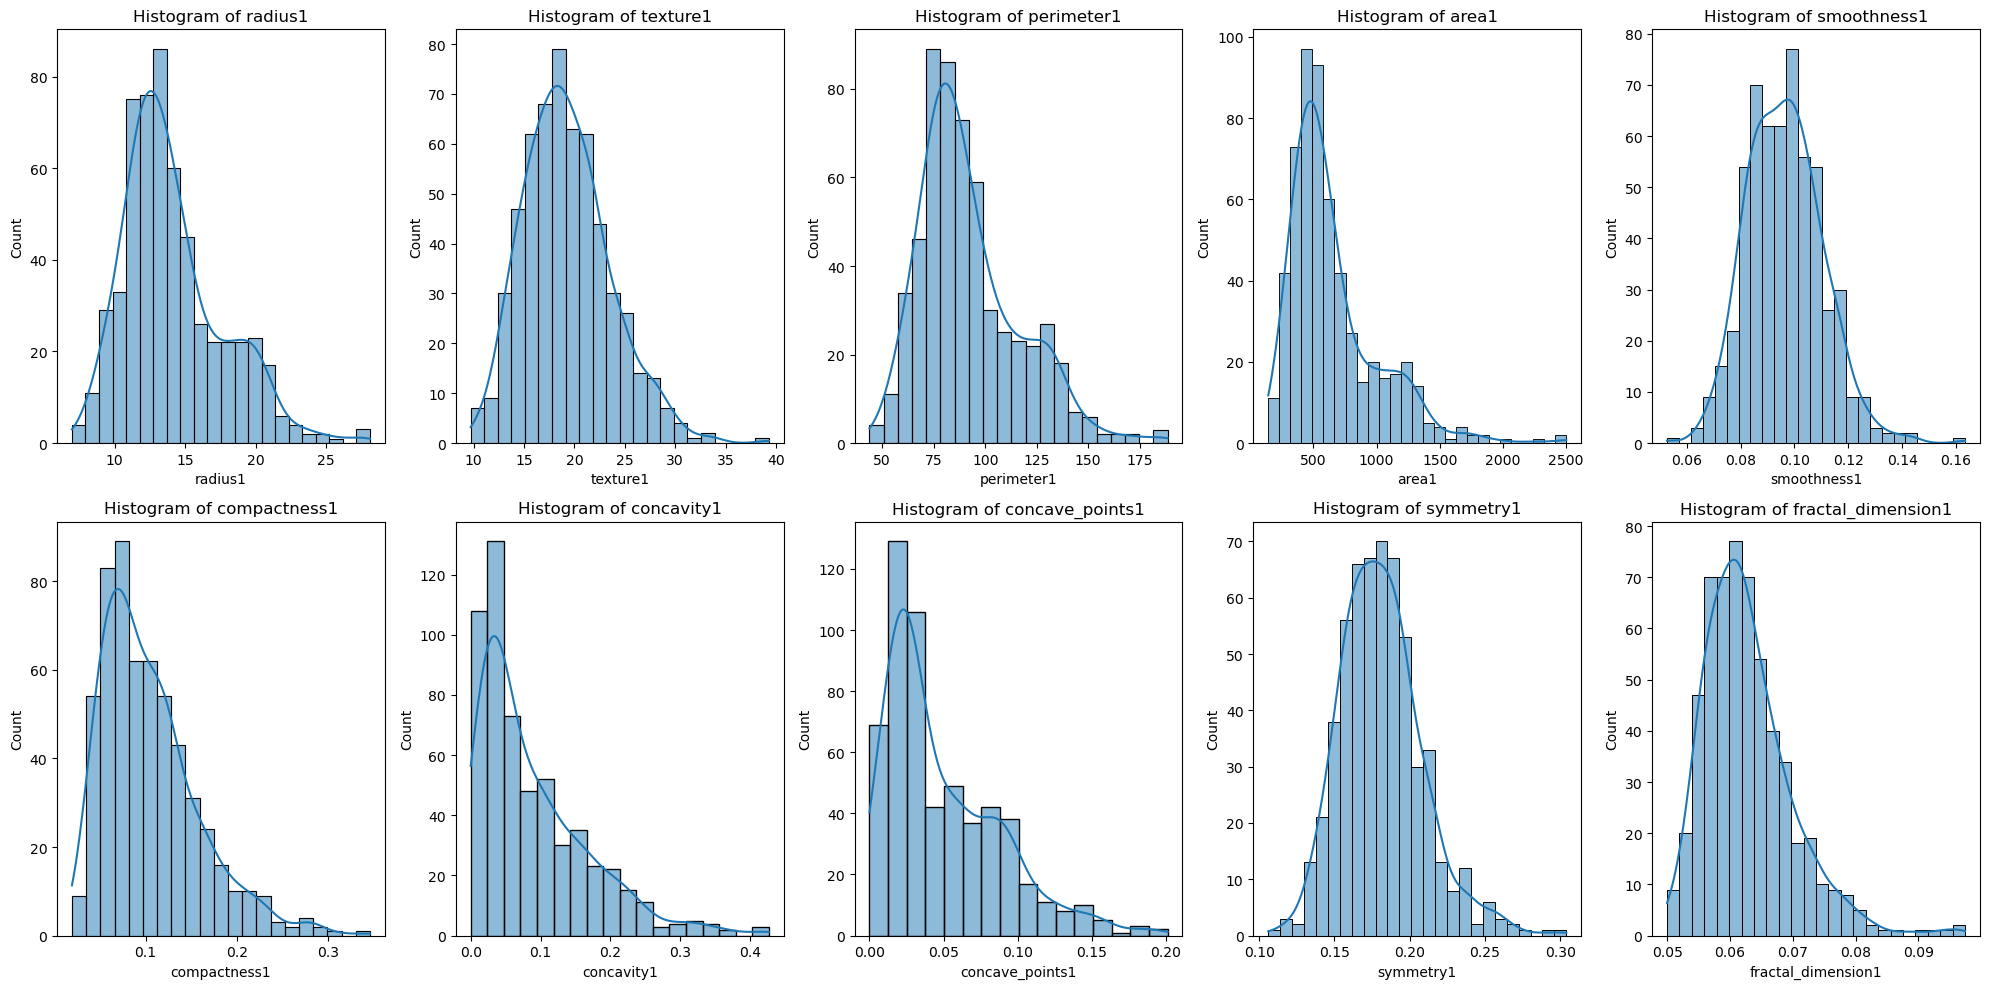

In [8]:
# Visualizing the distribution of the first 10 columns


# Slicing out the first 10 columns
features = df.iloc[:, :10]


# setting fiquresize
plt.figure(figsize=(20, 10))

# 1. Histogram for each numerical feature
for i, col in enumerate(features.columns, start=1):
    plt.subplot(2, 5, i)  # Adjust grid size for 10 plots
    sns.histplot(features[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

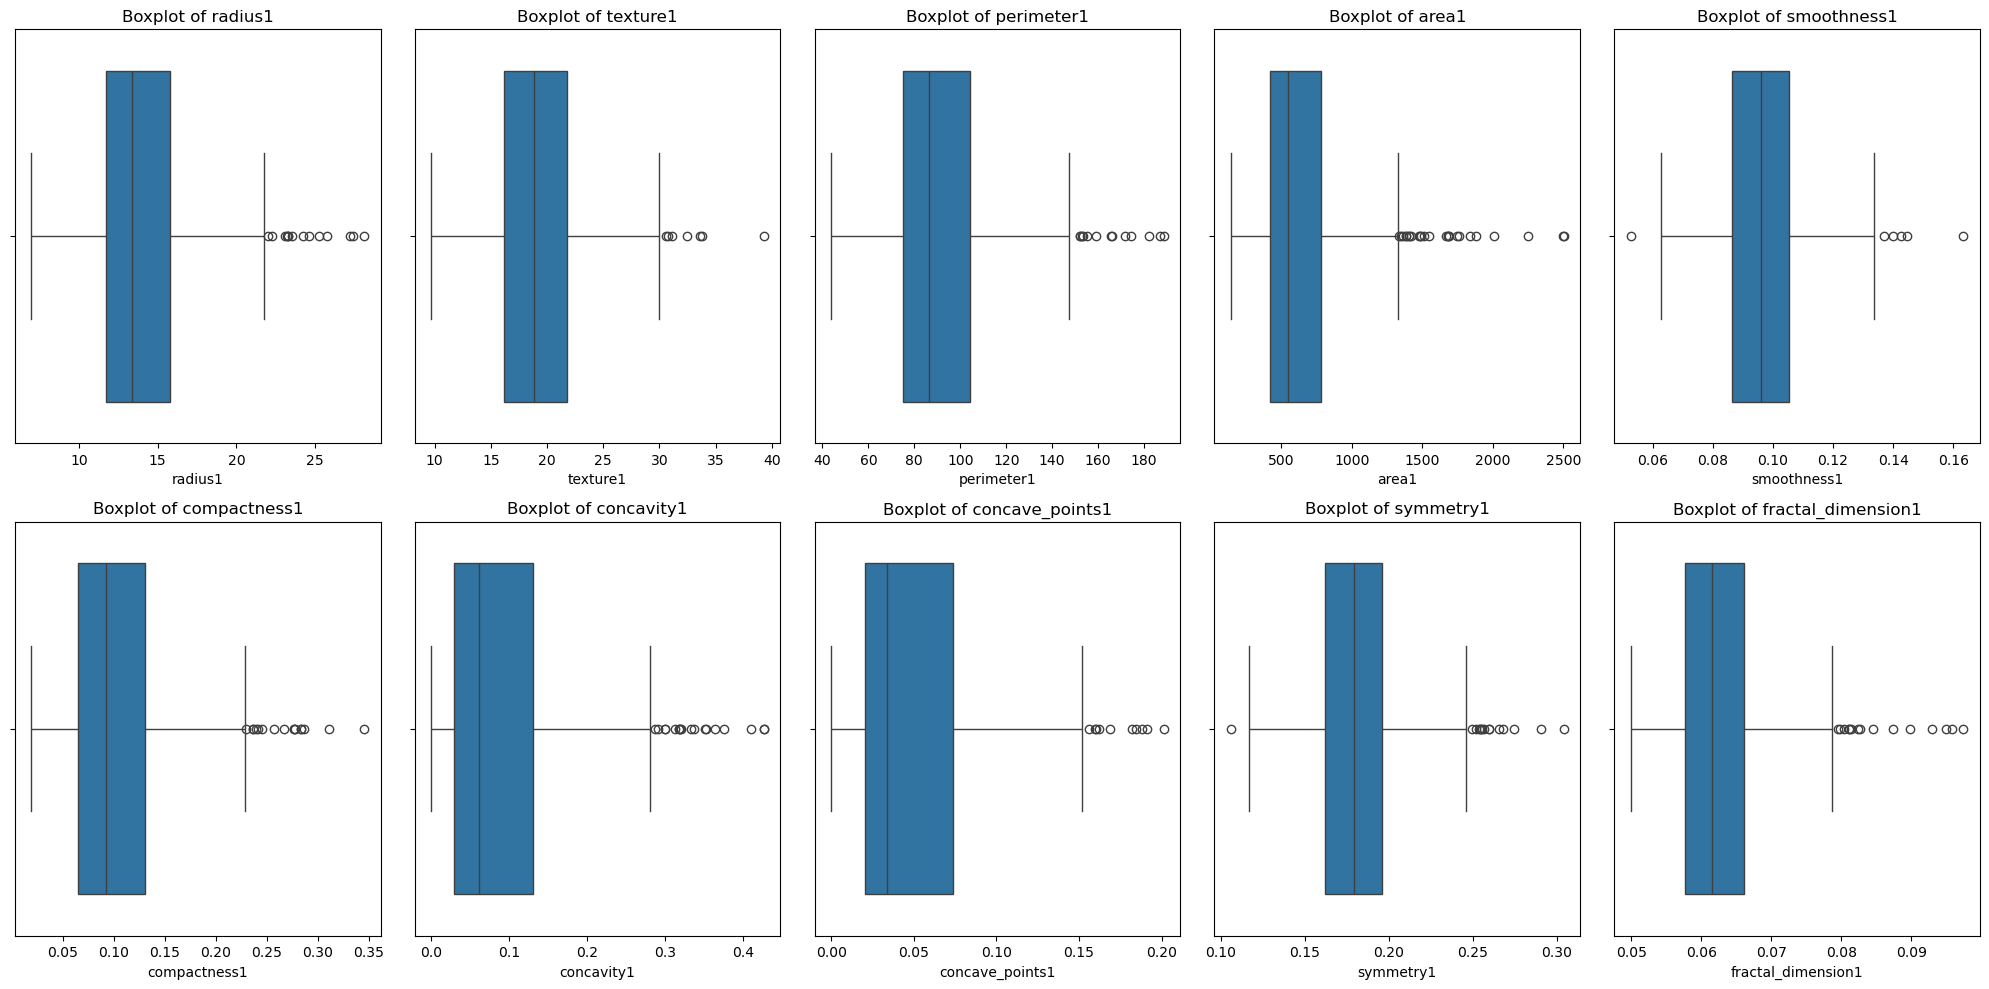

In [9]:
# 2. Boxplot for first 10 feature

plt.figure(figsize=(20, 10))
for i, col in enumerate(features.columns, start=1):
    plt.subplot(2, 5, i)  # Adjust grid size for 10 plots
    sns.boxplot(features[col], orient='h')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [14]:
# Visualizing Relationships among some features

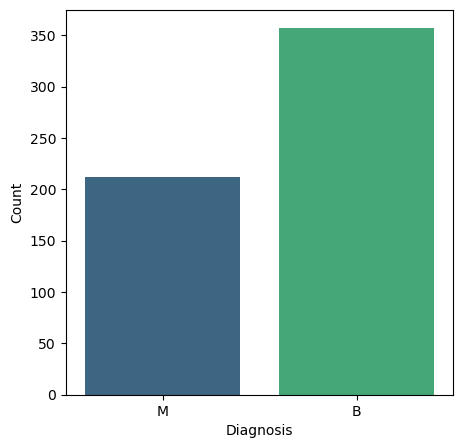

In [31]:

plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='Diagnosis', palette='viridis')

# Adding title and labels

plt.xlabel('Diagnosis')
plt.ylabel('Count')

# Display the plot
plt.show()


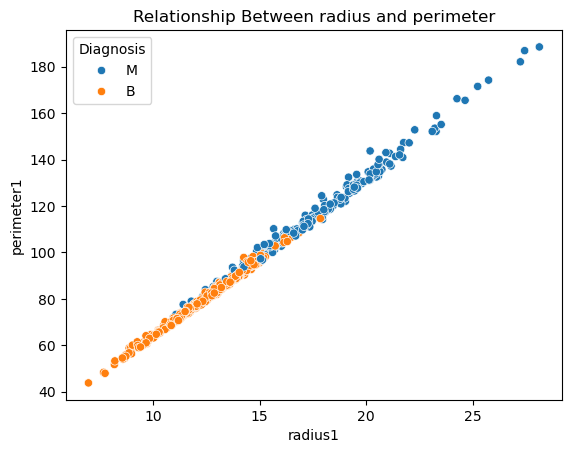

In [18]:
sns.scatterplot(data = df, x='radius1', y='perimeter1', hue='Diagnosis')
plt.title('Relationship Between radius and perimeter', fontsize=12)
plt.show()

This scatterplot shows a strong linear relationship between "radius1" and "perimeter1," with data points color-coded by diagnosis: "M" (Malignant) in blue and "B" (Benign) in orange. Malignant cases generally have larger values for both features, indicating these attributes may be useful for classification.

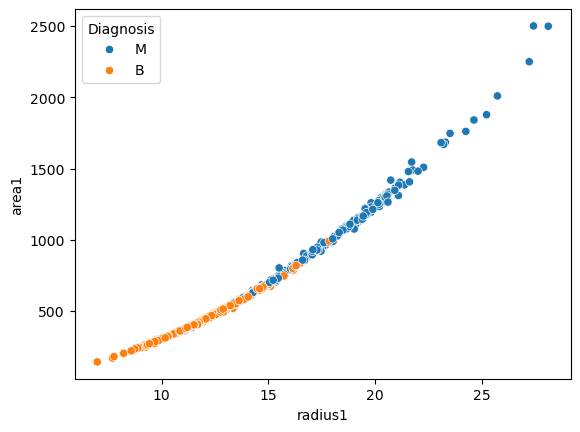

In [18]:
sns.scatterplot(data = df, x='radius1', y='area1', hue='Diagnosis')
plt.show()

This plot shows the relationship between the radius1 and area1 features, categorized by the Diagnosis variable (M for malignant and B for benign). It suggests a positive correlation between radius1 and area1, with clear separation between the two diagnostic groups. The malignant cases (blue) generally occupy a higher range, while benign cases (orange) are clustered lower

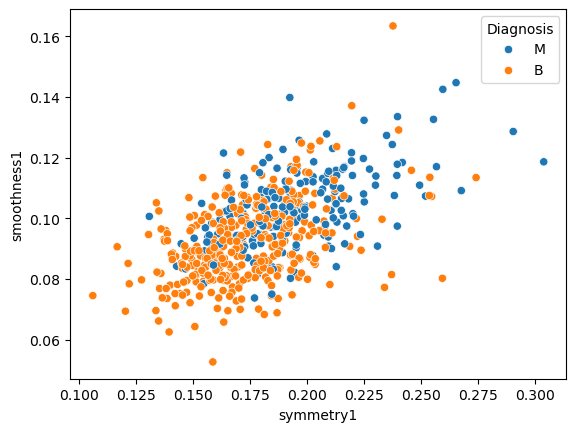

In [19]:
sns.scatterplot(data = df, x='symmetry1', y='smoothness1', hue='Diagnosis')
plt.show()

The scatterplot shows the relationship between "symmetry1" and "smoothness1," differentiated by the diagnosis categories "M" (Malignant) and "B" (Benign). Malignant cases (blue) and benign cases (orange) exhibit overlapping distributions but with some separability.

# Data Preprocessing

In [20]:
# No missing values was observed after carrying out EDA

In [22]:
# Checking features correlation
corr = df.corr()
corr

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


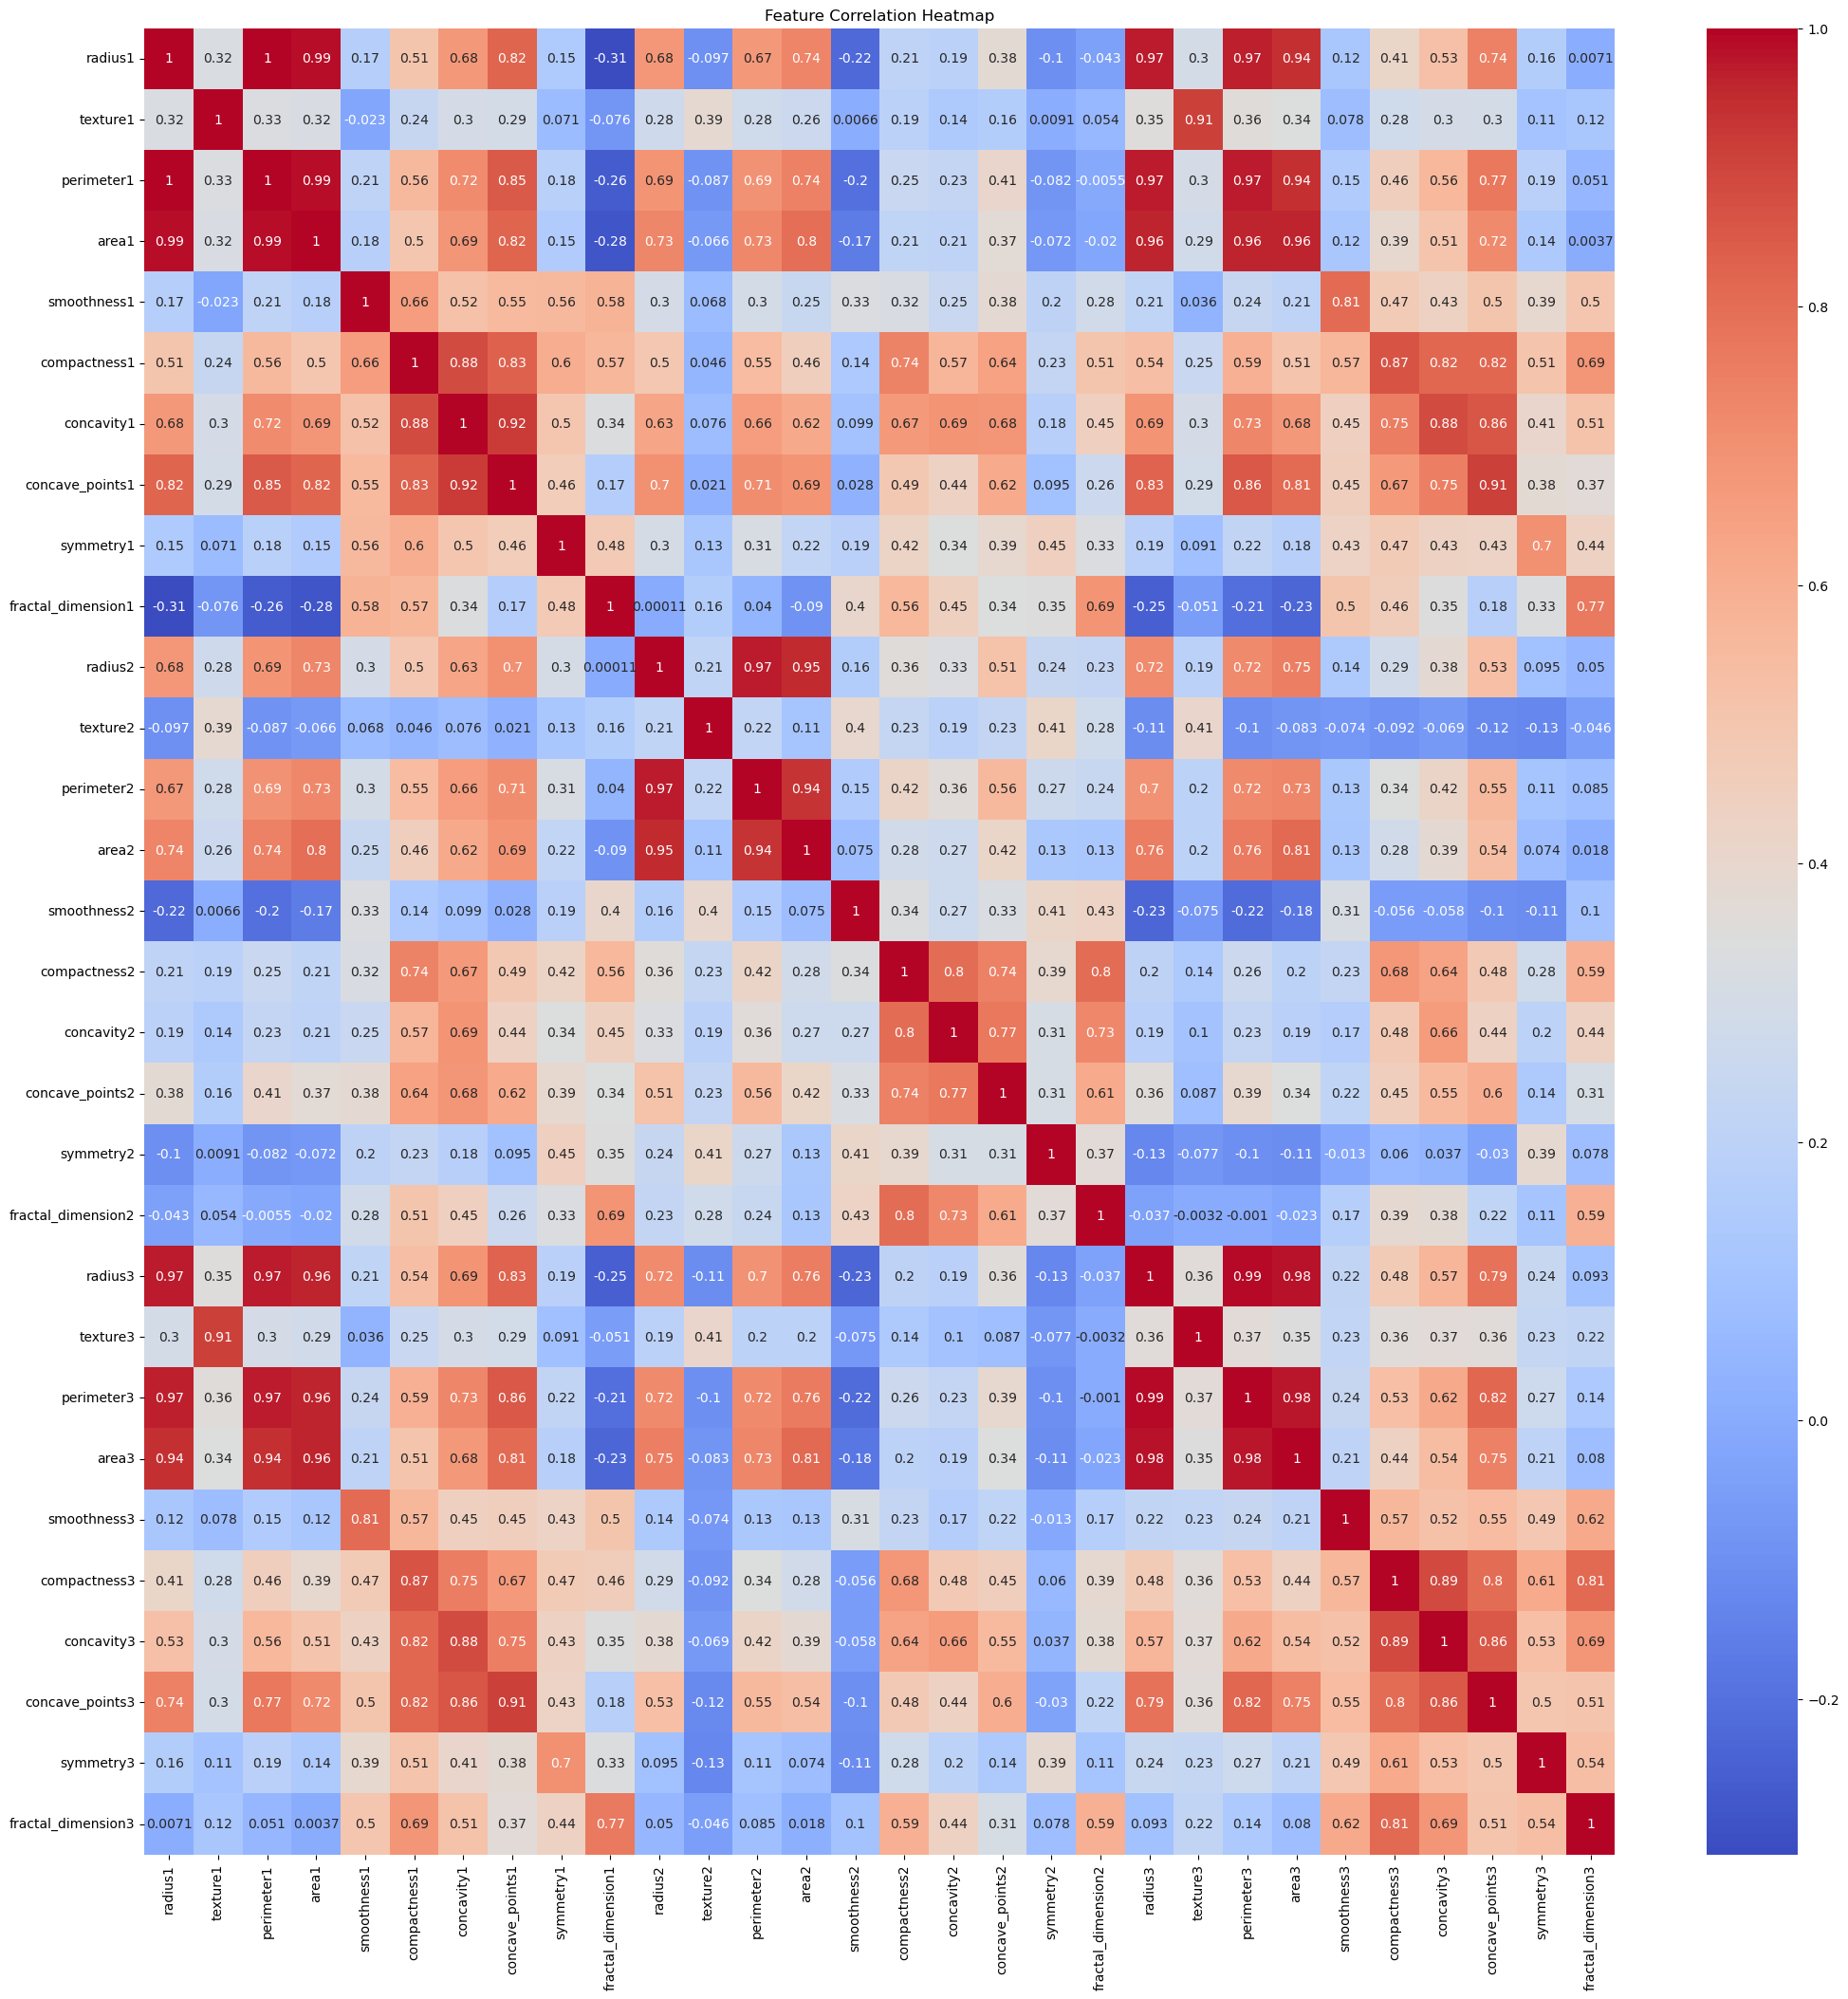

In [20]:
# Correlation heatmap
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

I will do the feature engineering before further data preprocessing, so as not to introduce new features after encoding and scaling

### Feature Engineering

Since the all features (except Diagnosis) were recorded and computed in triplicates, the average of the features will be calculated and computed

# FEATURE SELECTION

In [35]:

# Feature importance using Random Forest
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
rf = RandomForestClassifier()
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
print('feature importance by randomforest')

print(importances.sort_values(ascending=False))

# Mutual information
mi = mutual_info_classif(X, y)
mi_scores = pd.Series(mi, index=X.columns)
print('mutual info')
print(mi_scores.sort_values(ascending=False))

feature importance by randomforest
area3                 0.138908
perimeter3            0.119970
concave_points3       0.118760
concave_points1       0.103464
radius3               0.098399
radius1               0.057429
concavity3            0.055103
area2                 0.054728
area1                 0.034286
concavity1            0.029042
perimeter1            0.027623
radius2               0.023483
compactness3          0.018890
texture3              0.015090
symmetry3             0.014163
smoothness3           0.013594
texture1              0.012416
concave_points2       0.007782
fractal_dimension3    0.006980
perimeter2            0.006807
smoothness1           0.006727
fractal_dimension2    0.005149
compactness2          0.004928
smoothness2           0.004389
symmetry1             0.004062
compactness1          0.004046
symmetry2             0.004022
fractal_dimension1    0.003720
concavity2            0.003290
texture2              0.002750
dtype: float64
mutual info
perimete

In [27]:
"""We have to split the dataset to prevent data leakages when carrying out Encoding and Scaling"""

# Splitting the data into training and testing datasets
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Diagnosis'], random_state=42)

In [28]:
train_df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,symmetry,fractaldimension,Diagnosis
149,9.776667,13.709133,62.294333,444.123333,0.059796,0.087360,0.067670,0.026436,0.131863,0.042639,B
180,20.392033,18.733667,136.240000,1864.900000,0.087077,0.206723,0.284063,0.156337,0.160450,0.047089,M
174,7.510300,12.091667,47.615000,259.960000,0.068078,0.040367,0.000000,0.000000,0.165483,0.040797,B
160,8.523933,16.027667,56.312000,334.013333,0.084711,0.109117,0.101900,0.042663,0.183357,0.049820,B
429,8.945133,13.171200,57.319667,370.446667,0.064366,0.051003,0.018031,0.020031,0.127267,0.038957,B


In [29]:
test_df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concavepoints,symmetry,fractaldimension,Diagnosis
365,15.109367,16.355600,99.739333,1048.480000,0.076803,0.123253,0.130647,0.089653,0.145717,0.041609,M
159,7.847267,10.640467,49.522667,285.113333,0.066131,0.042085,0.007822,0.016565,0.144790,0.045648,B
306,9.266767,12.281167,59.091333,396.566667,0.067181,0.064990,0.004596,0.010216,0.147247,0.048458,B
357,9.744767,14.384333,62.332333,436.280000,0.069456,0.054553,0.024375,0.027494,0.131347,0.044016,B
282,14.553633,15.941700,94.167667,942.053333,0.087051,0.180363,0.208263,0.111610,0.188177,0.046252,M


In [30]:
# Initializing the LabelEncoder
le = LabelEncoder()


# Fit on the training set and transform both sets
train_df['Diagnosis'] = le.fit_transform(train_df['Diagnosis'])
test_df['Diagnosis'] = le.transform(test_df['Diagnosis'])

In [31]:
print(le.classes_)

['B' 'M']


B : 0

M : 1

In [32]:
# Separating features (X) and target (y) for training
X_train = train_df.drop(columns='Diagnosis')
y_train = train_df['Diagnosis']

# Separating features (X) and target (y) for testing
X_test = test_df.drop(columns='Diagnosis')
y_test = test_df['Diagnosis']

In [33]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

X_test=scaler.transform(X_test)

In [34]:
# HANDLING IMBALANCED DATA

<Axes: xlabel='perimeter', ylabel='texture'>

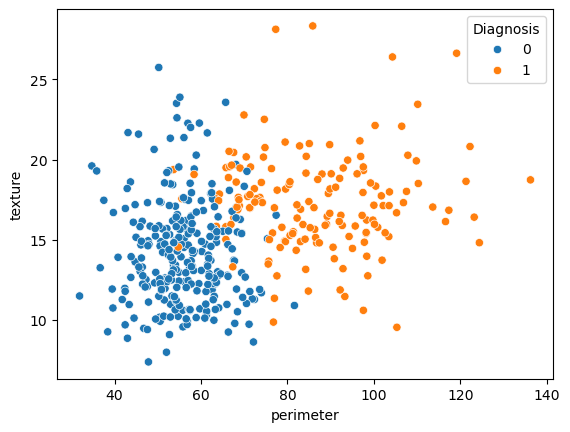

In [35]:
sns.scatterplot(data = train_df, x='perimeter', y='texture', hue='Diagnosis')

In [36]:
# target (Diagnosis) distribution

train_df.Diagnosis.value_counts()

0    276
1    160
Name: Diagnosis, dtype: int64

In [37]:
# Percentage of target (Diagnosis) distribution
print((train_df['Diagnosis'].value_counts() / len(train_df) * 100).round(2))

0    63.3
1    36.7
Name: Diagnosis, dtype: float64


In [38]:
# Balancing the Training set with SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verifying the class distribution after balancing
from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_balanced))

Class distribution before SMOTE: Counter({0: 276, 1: 160})
Class distribution after SMOTE: Counter({0: 276, 1: 276})


In [39]:
balanced_df = pd.DataFrame(X_train_balanced, columns=train_df.drop(columns='Diagnosis').columns)
balanced_df['Diagnosis'] = y_train_balanced

<Axes: xlabel='perimeter', ylabel='texture'>

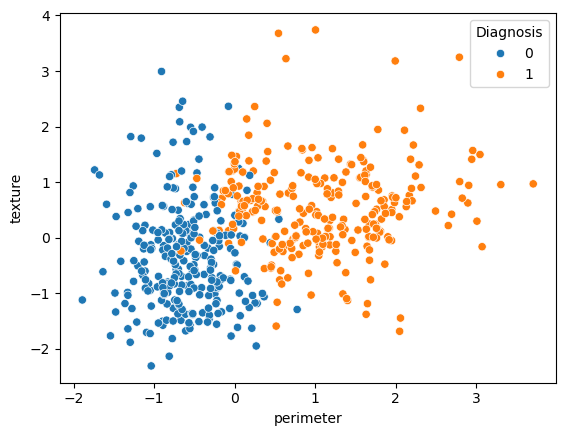

In [40]:
sns.scatterplot(data = balanced_df, x='perimeter', y='texture', hue='Diagnosis')

In [41]:
balanced_df.Diagnosis.value_counts()

0    276
1    276
Name: Diagnosis, dtype: int64

In [42]:
# The training data has is now balanced

## Initializing and training the model

In [43]:
# Initializing model
logistic=LogisticRegression()

logistic.fit(X_train_balanced, y_train_balanced)
y_pred=logistic.predict(X_test)

0.963302752293578
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       1.00      0.90      0.95        40

    accuracy                           0.96       109
   macro avg       0.97      0.95      0.96       109
weighted avg       0.97      0.96      0.96       109

[[69  0]
 [ 4 36]]


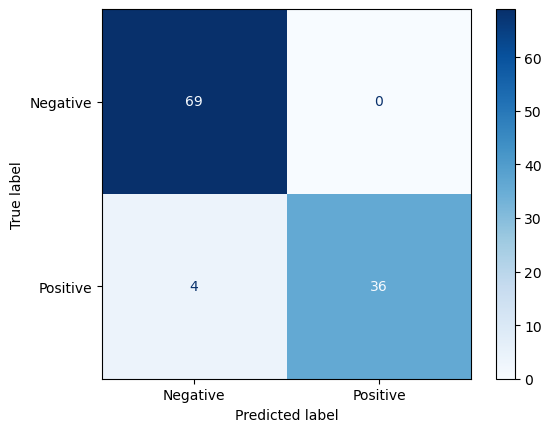

In [44]:
# Evaluation Metrics

cm = confusion_matrix(y_test, y_pred)
score=accuracy_score(y_test, y_pred)
print(score)
print(classification_report(y_test, y_pred))
print(cm)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")

### From the Classification report and the confusion matrix

 **Accuracy**: The model correctly classified 96.33% of samples (0.9633). 


 **Class 0 (Benign)**:  

  - Precision: 0.95 (95% of predicted benign samples are correct).  
  - Recall: 1.00 (100% of actual benign samples are identified).  
  - F1-Score: 0.97 (harmonic mean of precision and recall).  
  - Support: 69 samples. 
  
 **Class 1 (Malignant)**:  

  - Precision: 1.00 (100% of predicted malignant samples are correct).  
  - Recall: 0.90 (90% of actual malignant samples are identified).  
  - F1-Score: 0.95.  
  A high F1-score, like 0.95, indicates that the model achieves an excellent balance between precision and recall
  - Support: 40 samples.  
  
 **Confusion Matrix**: 

  - True negatives: 69.  
  - False positives: 0.  
  - False negatives: 4.  
  - True positives: 36. 
  
 **Summary**: The model performs well overall, with slightly lower recall for malignant cases.

### Hyperparameter Tuning And Cross Validation

### Grid SearchCV

In [45]:
model=LogisticRegression()
penalty=['l1', 'l2', 'elasticnet']
c_values=[100,10,1.0,0.1,0.01]
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [46]:
params=dict(penalty=penalty,C=c_values,solver=solver)

In [47]:
cv=StratifiedKFold()

In [48]:
# GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [49]:
grid.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [50]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

In [51]:
grid.best_score_

0.9800327600327601

In [52]:
y_pred1=grid.predict(X_test)

0.963302752293578
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       1.00      0.90      0.95        40

    accuracy                           0.96       109
   macro avg       0.97      0.95      0.96       109
weighted avg       0.97      0.96      0.96       109

[[69  0]
 [ 4 36]]


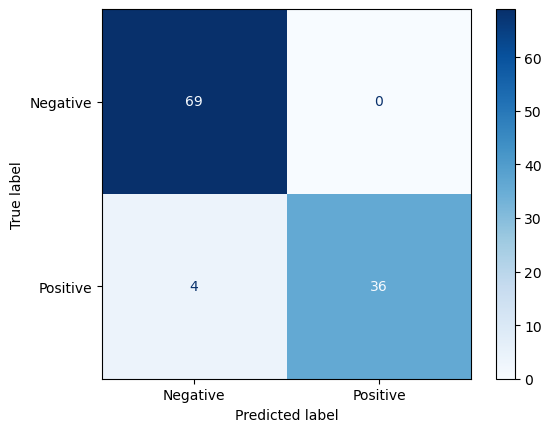

In [53]:
score=accuracy_score(y_test, y_pred1)
print(score)
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

cm = confusion_matrix(y_test, y_pred1)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")


### Randomized SearchCV

In [54]:
params = {
    'C': loguniform(0.001, 10),  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Penalty types
    'solver': ['saga', 'liblinear', 'lbfgs'],  # Solvers supporting penalties
}

In [55]:
model=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,scoring='accuracy')

In [56]:
randomcv.fit(X_train_balanced, y_train_balanced)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CFB3EEEB90>,
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['saga', 'liblinear',
                                                   'lbfgs']},
                   scoring='accuracy')

In [57]:
randomcv.best_score_

0.9782637182637183

In [58]:
randomcv.best_params_

{'C': 0.10351664828428724, 'penalty': None, 'solver': 'saga'}

In [59]:
y_pred2=randomcv.predict(X_test)

0.963302752293578
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        69
           1       1.00      0.90      0.95        40

    accuracy                           0.96       109
   macro avg       0.97      0.95      0.96       109
weighted avg       0.97      0.96      0.96       109

[[69  0]
 [ 4 36]]


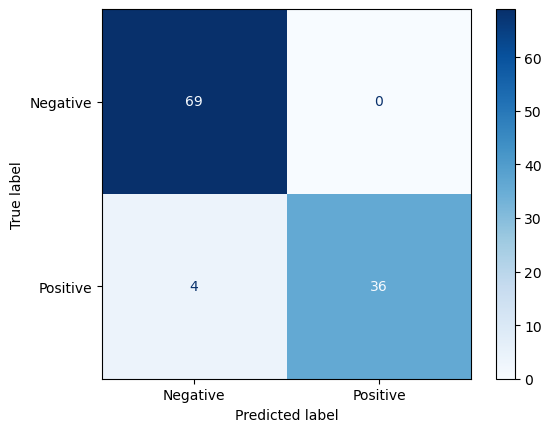

In [60]:
score=accuracy_score(y_test, y_pred2)
print(score)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

cm = confusion_matrix(y_test, y_pred2)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")


## After carrying out hyperparameter tuning using GridSearch and RandomSearch, it was observed that the evaluation metrics remain the same.


This might indicates that the model is likely well-optimized with its current hyperparameters, and further tuning using GridSearch and RandomSearch did not improve its performance. The following reasons might explain this:  

1. **Model Saturation**: The model might have reached its performance limit with the given data and features.  
2. **Data Limitation**: The dataset might not contain additional information that could improve the model's ability to distinguish between classes.  
3. **Tuning Insensitivity**: The chosen hyperparameters may not have significantly impact the model's performance. 


### Futher Actions To Carry-Out:
- Investigate feature engineering or dimensionality reduction to improve the model.  
- Try alternative algorithms to test if the current model is inherently limited.  
- Validate the robustness of the model with further cross-validation or additional datasets.  

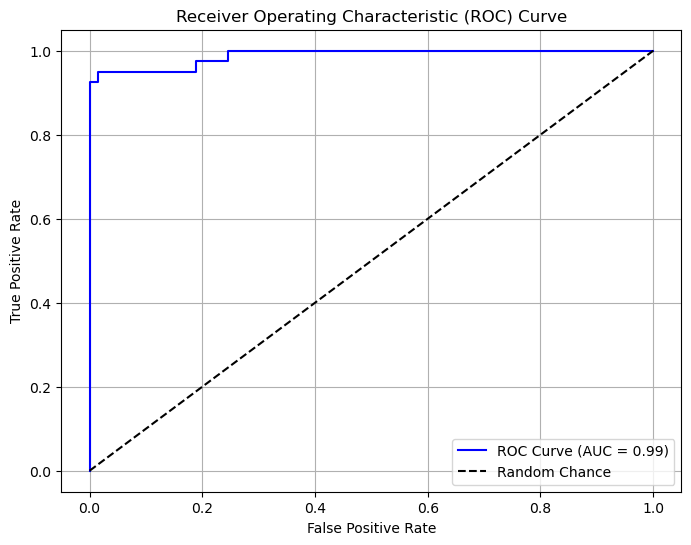

In [61]:
# ROC Curve

# Predicted probabilities
y_probs = randomcv.best_estimator_.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


The **ROC (Receiver Operating Characteristic) Curve** evaluates the performance of a binary classification model by plotting:

- **X-axis (False Positive Rate)**: The proportion of negatives incorrectly classified as positives.  
- **Y-axis (True Positive Rate)**: The proportion of positives correctly classified.

### Key Observations:
1. **Blue Curve**: Represents the model's performance.  
   - The closer it is to the top-left corner, the better the model distinguishes between classes.
2. **Dashed Line**: Represents random chance (AUC = 0.5). The ROC analysis reveals that the model performs better than random guessing as the curve is substantially above the dashline.
3. **AUC (Area Under Curve) = 0.99**: Indicates excellent model performance, as it’s very close to 1.0, suggesting high true positive rates with low false positives.  

### Summary:
The model is highly effective in classification with minimal misclassifications.

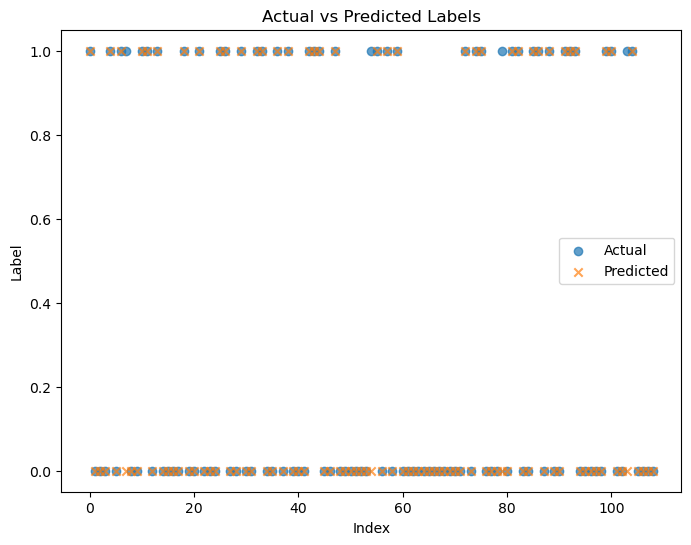

In [62]:
# Creating a DataFrame of actual vs predicted
actual_vs_predicted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': randomcv.best_estimator_.predict(X_test)
}).reset_index(drop=True)

# Plotting comparison
plt.figure(figsize=(8, 6))
plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Actual'], label="Actual", alpha=0.7)
plt.scatter(actual_vs_predicted.index, actual_vs_predicted['Predicted'], label="Predicted", alpha=0.7, marker='x')
plt.title("Actual vs Predicted Labels")
plt.xlabel("Index")
plt.ylabel("Label")
plt.legend()
plt.show()


The plot compares the **actual labels** (blue dots) with the **predicted labels** (orange crosses) for a binary classification problem.

- The **X-axis (Index)** represents the index of data points in the test dataset.
- The **Y-axis (Label)** represents the binary classes: `0` and `1`.
- **Overlap of Points**: The blue dots and orange crosses overlap closely, indicating the model's predictions align well with the actual labels for most data points.
- **Misclassifications**: The orange crosses that don't overlap with blue dots represent incorrect predictions. Though there appear to be very few of these, indicating good model performance.

The plot visually confirms that the model predicts accurately in most cases.

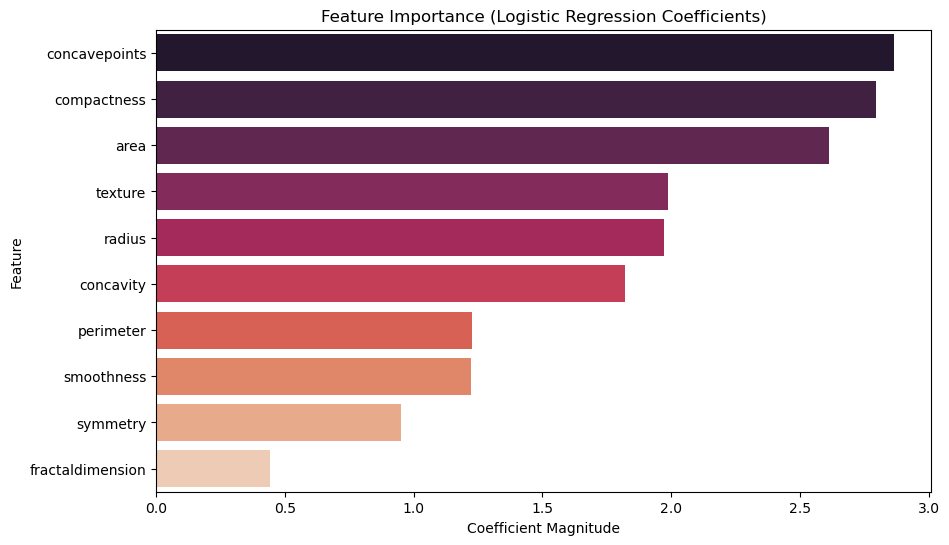

In [63]:
#  Getting the Features names
features = train_df.drop(columns='Diagnosis').columns.tolist()

# Coefficients
coefficients = randomcv.best_estimator_.coef_.flatten()

# Sortting by importance
importance_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
importance_df['Abs_Coefficient'] = np.abs(importance_df['Coefficient'])
importance_df = importance_df.sort_values('Abs_Coefficient', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data = importance_df, x='Abs_Coefficient', y = 'Feature', palette='rocket')
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance (Logistic Regression Coefficients)")
# plt.gca().invert_yaxis()
plt.show()




This bar chart displays the feature importance based on the absolute values of logistic regression coefficients. Features like "concavepoints," "compactness," and "area" are the most influential in predicting the target variable, while "fractal dimension" has the least impact.

**Future Research Directions**   
     - Explore advanced models (e.g., Random Forest, XGBoost).  
     - Perform feature selection to reduce redundancy.  
     - Tune hyperparameters to optimize model performance further. 
     - Incorporate additional datasets to improve generalizability.  
     - Develop a pipeline for real-time diagnosis in clinical settings.  
     - Explore deep learning methods for feature extraction and classification.

Please give your suggestion

Please upvote if you like this notebook